In [1]:
import os

import cmcrameri.cm as cmc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import math
import pickle


In [2]:
def gaussian(x, amp=0.85804736, mean=0.54331667, stddev=0.2471021):
    #gaussian(x, 0.85804736, 0.54331667, 0.2471021)
	return amp * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2))

In [3]:
def triangle(x, center = 0.55, peak = 1, start = 0.05, end = 1.05):
    x = np.array(x)
    dx = 1/len(x)
    y = np.zeros(len(x))

    left_m = peak/(center-start)
    right_m = peak/(end-center)

    #print(left_m, right_m)

    y[int(start/dx):int(center/dx)] = left_m*x[int(start/dx):int(center/dx)]
    y[int(start/dx):int(center/dx)] = y[int(start/dx):int(center/dx)] - y[int(start/dx)]
    y[int(center/dx):int(end/dx)] = -right_m*x[int(center/dx):int(end/dx)]
    y[int(center/dx):int(end/dx)] = y[int(center/dx):int(end/dx)] + abs(y[int(center/dx)]) + peak
    y[0: int(0.14*len(x))] = 1.13*x[0:int(0.14*len(x))] + 0.03
    #print(y[int(len(x)*((end-center)/(end-start)))])
    # y[:int(len(right_m)] = y[:int(len(right_m)] - min(y[:int(len(x)/2)])
    # y[int(len(x)/2):] = y[int(len(x)/2):] - min(y[int(len(x)/2):])

    return y

In [4]:
def boxcar(x, start=0.2, end=0.2, peak=0.85):
    length = len(x)
    start_index = int(start*len(x))
    end_index = int(end*len(x))
    y = np.zeros(len(x))
    y[start_index:length-end_index] = peak

    return y

In [5]:
def trapezium(x, start = 0.46, end = 0.4, peak = 0.85, start_height = -0.1, end_height = 0.11):
    length = len(x)
    start_index = int(length*start)
    end_index = int(length*end)
    #print(length, start_index, end_index)

    y = np.zeros(length)

    y[:start_index] = np.linspace(start_height, peak, start_index)
    y[start_index:length-end_index] = peak
    y[length-end_index:] = peak - np.linspace(end_height, peak, end_index) + end_height
    y[0: int(0.14*len(x))] = 1.13*x[0:int(0.14*len(x))] + 0.03
    return y


In [6]:
def sine_boxcar(x, start = 0.55, end = 0.45, peak = 0.85, start_height = 0.05, end_height = 0.2):
    length = len(x)
    start_index = int(length*start)
    end_index = int(length*end)
    #print(length, start_index, end_index)

    y = np.zeros(length)

    y[:start_index] = (np.sin(np.linspace(-math.pi/2, math.pi/2, start_index))+1)*((peak-start_height)/2)+start_height
    y[start_index:length-end_index] = peak
    y[length-end_index:] = ((np.sin(np.linspace(-math.pi/2, math.pi/2, end_index)))[::-1]+1)*((peak-end_height)/2)+end_height
    return y

In [7]:
# looks for time value of root
def f3(end_time, total_moment, time_opt, momentrate_opt, start, points_before_zero, proportion = 0.1):
    dx = time_opt[1]-time_opt[0]
    #print('dx', dx)
    #print('endtime', end_time)
    #print('points before zero', points_before_zero)
    end_window = (end_time/dx)+points_before_zero
    #print('end winodw', end_window)
    end = int(np.floor(end_window))
    if start == end:
        end += 1
    short = scipy.integrate.simpson(momentrate_opt[start:end], dx = dx)
    return short-(total_moment*proportion)

In [8]:
def comparison_calculation(funct):
    proportions_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

    #print(proportion)
    durations = []
    g_root_times = []
    g_relative_root_times = []


    for proportion in proportions_list:

        diff = []
        moments = []


        # Generate x values
        x = np.arange(0, 1, 0.0001)

        # Generate y values
        y = funct(x)

        # Use the generated Gaussian values
        momentrate_opt, time_opt = y, x

        not_zero = np.where(momentrate_opt > 0)[0]

        dx = time_opt[1]-time_opt[0]

        start = min(not_zero)
        end = max(not_zero)
        points_before_zero = abs(min(time_opt)/dx)

        duration = time_opt[end] - time_opt[start]
        durations.append(duration)

        start_time = time_opt[start]
        end_time = time_opt[end]

        total_moment = scipy.integrate.simpson(momentrate_opt[start:end], dx = time_opt[1]-time_opt[0])
        moments.append(total_moment)
        g_root, r = scipy.optimize.bisect(f3,
                                        start_time+dx,
                                        end_time,
                                        rtol = 1e-6,
                                        full_output = True,
                                        args = (total_moment,
                                                time_opt,
                                                momentrate_opt,
                                                start,
                                                points_before_zero,
                                                proportion,))
        g_root_idx = np.floor(g_root/dx)
        g_root_time = g_root_idx*dx
        g_root_times.append(g_root_time)
        g_relative_root_times.append(g_root_time-start_time)

    g_relative_root_times = np.array(g_relative_root_times)
    return g_relative_root_times/durations

In [9]:
combined = pd.read_csv('/home/earthquakes1/homes/Rebecca/phd/stf/data/combined_scardec_ye_usgs_sigloch_isc_mag.csv')
combined.columns = ['event', 'scardec', 'ye', 'isc', 'sigloch', 'usgs', 'mag']

In [10]:
all_relative_root_times = [[],[],[],[],[],[],[],[],[],[],[]]

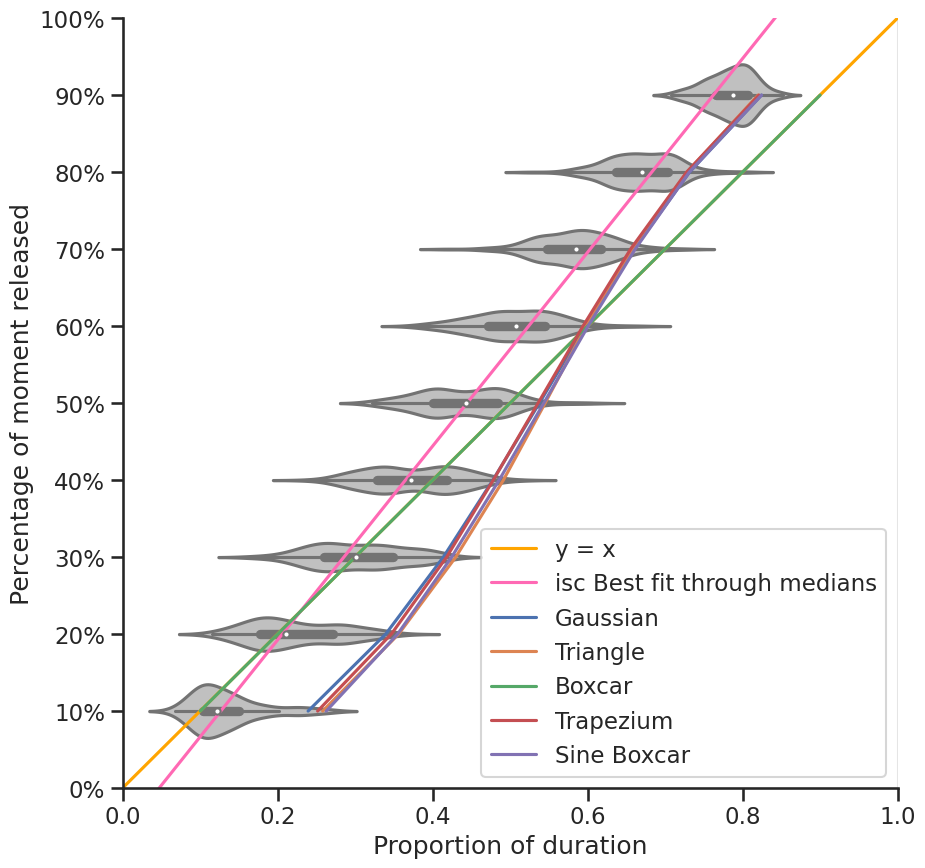

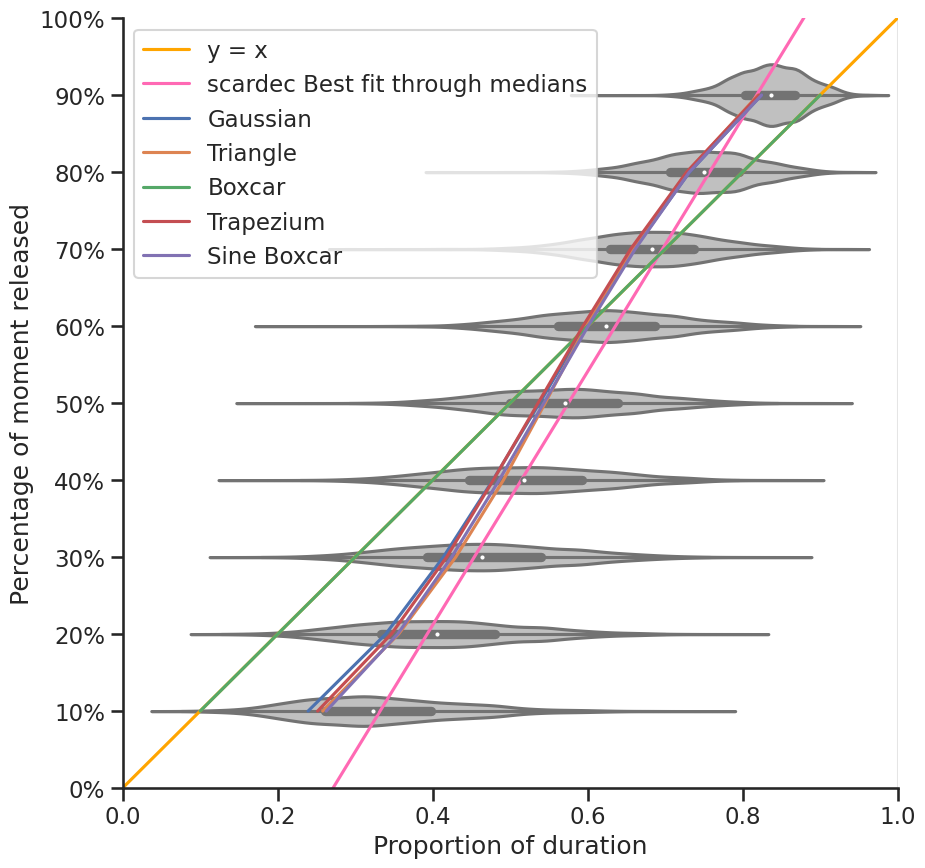

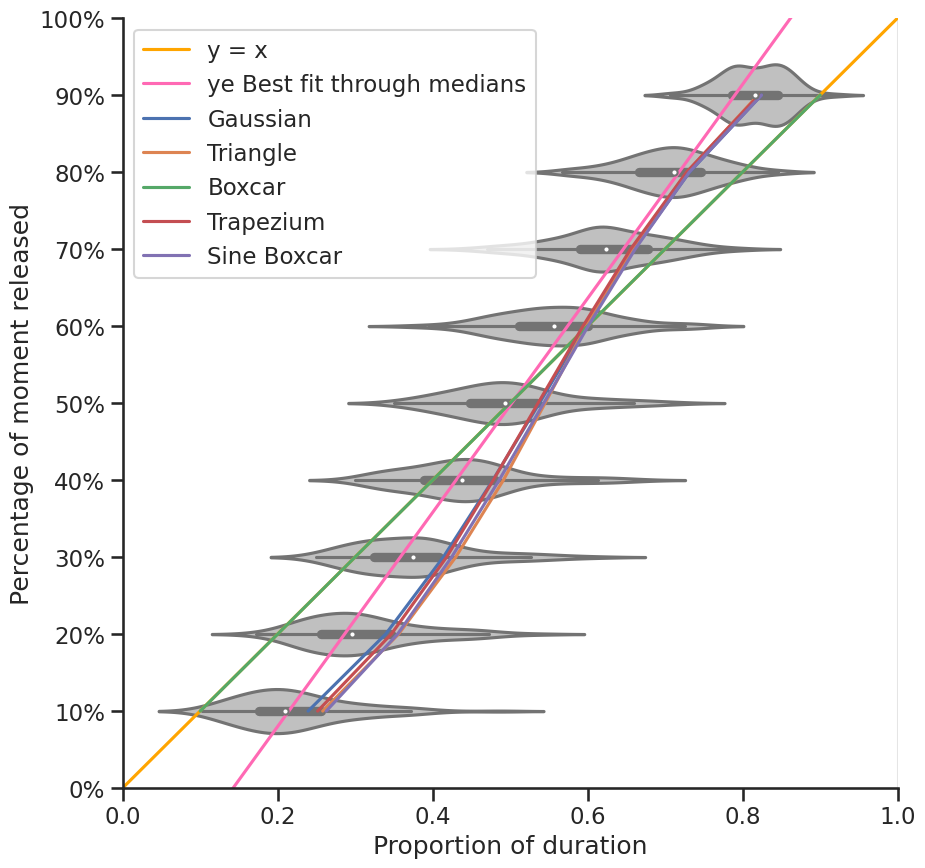

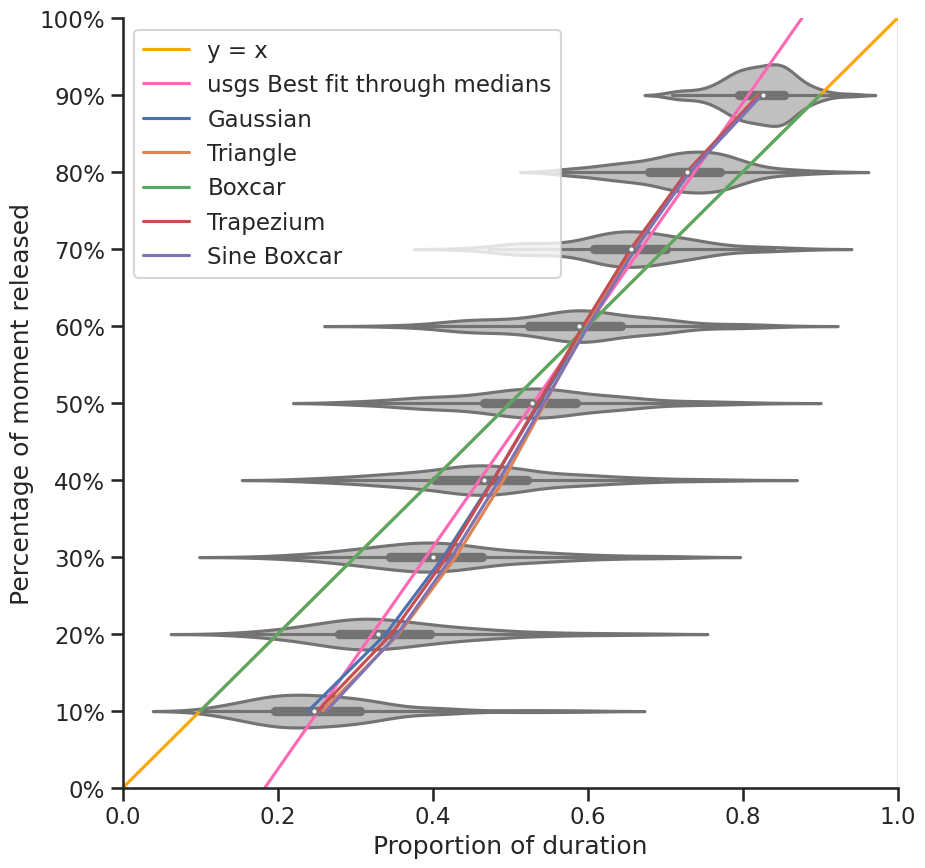

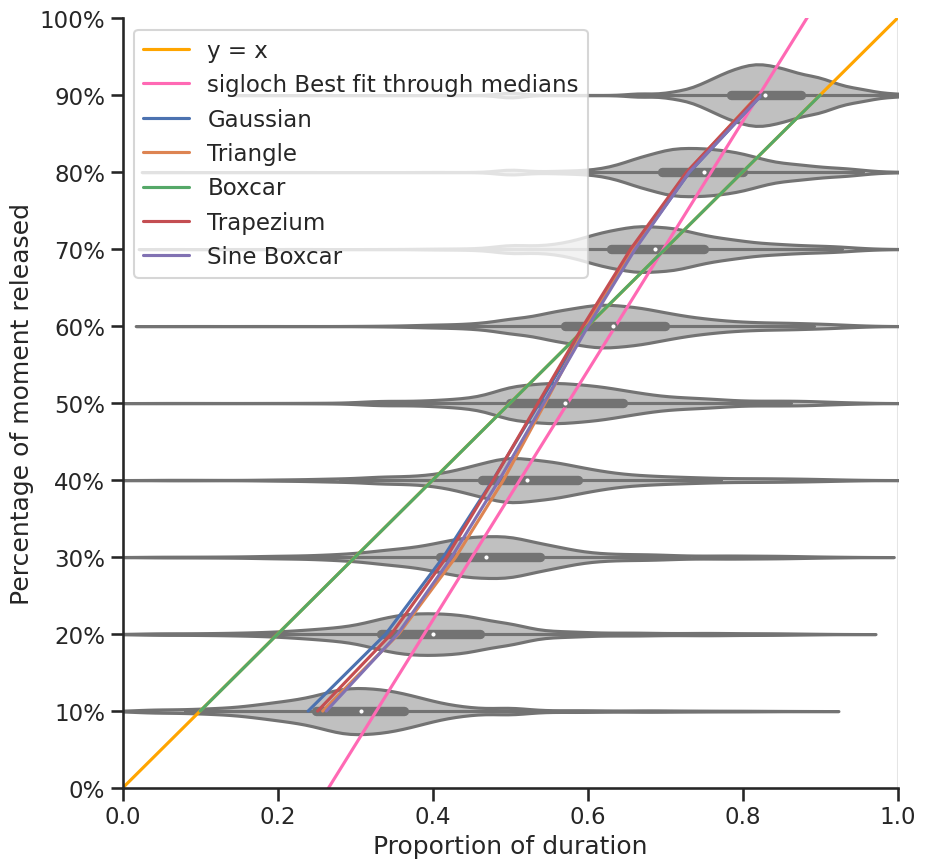

In [12]:
for dataset in ['isc', 'scardec', 'ye', 'usgs', 'sigloch']:
	df = pd.read_csv(f'/home/earthquakes1/homes/Rebecca/phd/stf/data/{dataset}_relative_root_times.csv')
	df.columns = ['event', '10', '20', '30', '40', '50', '60', '70', '80', '90']

	all_relative_root_times = [[],[],[],[],[],[],[],[],[],[],[]]
	for row in df.iterrows():
		row = row[1]
		all_relative_root_times[1].append(row['10'])
		all_relative_root_times[2].append(row['20'])
		all_relative_root_times[3].append(row['30'])
		all_relative_root_times[4].append(row['40'])
		all_relative_root_times[5].append(row['50'])
		all_relative_root_times[6].append(row['60'])
		all_relative_root_times[7].append(row['70'])
		all_relative_root_times[8].append(row['80'])
		all_relative_root_times[9].append(row['90'])

	sns.set_theme(style='ticks',
				context='talk',
				rc={'figure.figsize':(10,10),
					'font.size':20})

	ax = sns.violinplot(data = all_relative_root_times,
						orient = 'h',
						color = 'silver')
	ax.set_yticks(np.arange(len(np.arange(0, 1.1, 0.1))), [f'{p*100:.0f}%' for p in np.arange(0, 1.1, 0.1)])

	ax.set_ylabel('Percentage of moment released')
	ax.set_xlabel('Proportion of duration')

	ax.invert_yaxis()

	ax.plot(np.arange(0, 1.1, 0.1),
			np.arange(0, 11, 1),
			c = 'orange',
			label = 'y = x',)

	means = []
	medians = []

	for i in all_relative_root_times[1:-1]:
		total = np.sum(i)
		#print(total)
		mean = total/len(i)
		#print(mean)
		means.append(mean)
		medians.append(np.median(i))
		#print(np.median(i))
	# Calculate the line of best fit
	m, b = np.polyfit(means, np.arange(1, 10, 1), 1)
	# Plot the line of best fit
	# ax.plot(np.mean(all_relative_root_times[1:-1], axis=1),
	#         m * np.mean(all_relative_root_times[1:-1], axis=1) + b,
	#         c='red',
	#         label = 'Mean LoBF',
	#         linestyle = '--')

	# Calculate the line of best fit
	m, b = np.polyfit(medians, np.arange(1, 10, 1), 1)
	# Plot the line of best fit
	ax.plot(np.arange(0, 1, 0.1),
			m * np.arange(0, 1, 0.1) + b,
			c='hotpink',
			label = f'{dataset} Best fit through medians',
			linestyle = '-')


	for funct, label in zip([gaussian, triangle, boxcar, trapezium, sine_boxcar], ['Gaussian', 'Triangle', 'Boxcar', 'Trapezium', 'Sine Boxcar']):
			ax.plot(comparison_calculation(funct), np.arange(1, 10, 1), label = label)

	plt.ylim(-0, 10)
	plt.xlim(0, 1)

	ax.axvspan(1, 1.5, alpha = 0.2, color = 'grey')
	plt.legend()
	sns.despine()
	#plt.show()
	plt.savefig(f'/home/earthquakes1/homes/Rebecca/phd/stf/figures/comparisons_to_predictions/violinplot_{dataset}_from_obs.png', dpi = 300)
	plt.show()
	plt.close()

In [21]:
df

,event,10,20,30,40,50,60,70,80,90
0,20110126_1542_0,0.634146,0.739837,0.788618,0.813008,0.837398,0.853659,0.878049,0.902439,0.934959
1,20011012_1502_0,0.636364,0.666667,0.696970,0.727273,0.757576,0.787879,0.818182,0.848485,0.878788
2,20011012_1502_1,0.622222,0.688889,0.711111,0.755556,0.777778,0.777778,0.822222,0.844444,0.911111
3,20011012_1502_2,0.100000,0.100000,0.200000,0.200000,0.300000,0.300000,0.400000,0.500000,0.700000
4,20120320_1802_0,0.641379,0.717241,0.765517,0.793103,0.820690,0.841379,0.855172,0.889655,0.917241
...,...,...,...,...,...,...,...,...,...,...
4250,20090104_0714_0,0.833333,0.861111,0.875000,0.902778,0.902778,0.930556,0.930556,0.944444,0.972222
4251,20090104_0714_1,0.763636,0.781818,0.818182,0.836364,0.854545,0.854545,0.872727,0.909091,0.927273
4252,20080402_1910_0,0.842105,0.842105,0.894737,0.894737,0.894737,0.894737,0.947368,0.947368,0.947368
4253,20071025_0835_0,0.689655,0.758621,0.793103,0.827586,0.827586,0.827586,0.862069,0.862069,0.931034


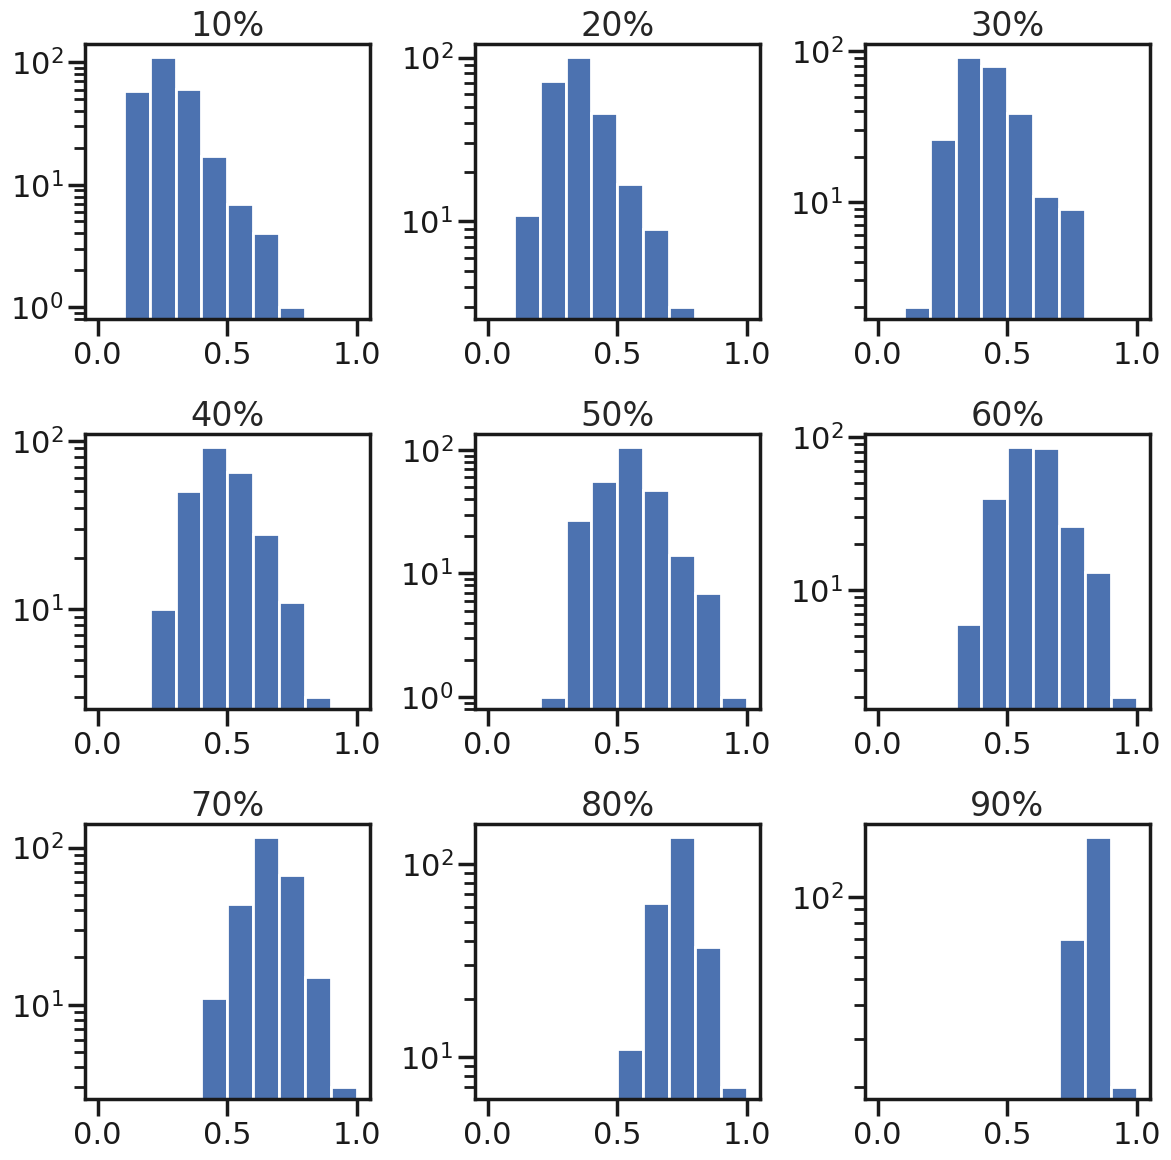

In [21]:
fig, axs = plt.subplots(3,3)
for i in range(9):
    ax = axs[i//3, i%3]
    ax.hist(all_relative_root_times[i+1], bins = np.arange(0 , 1.1, 0.1))
    ax.set_title(f'{proportions_list[i]*100:.0f}%')

    ax.set_yscale('log')

plt.tight_layout()
# plt.hist(all_relative_root_times[1:2])
# plt.yscale('log')

20101221_1719
20140401_2346
19940602_1817
20160829_0429
20160302_1249
20030715_2027
20180114_0918
20210213_1407
20150329_2348
19970421_1202
20130208_1526
20241110_1649


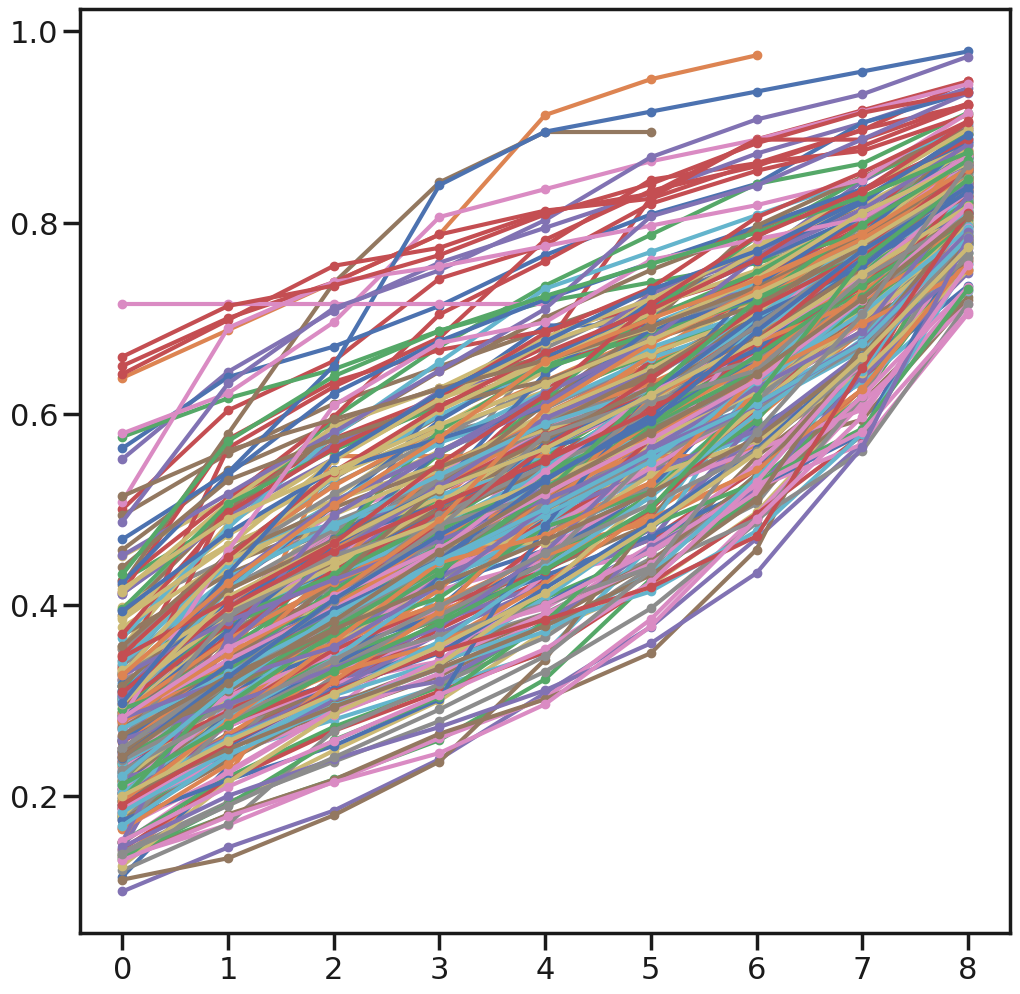

In [22]:
count = 0
for key in all_relative_root_times_for_event.keys():
    plt.plot(np.array(all_relative_root_times_for_event[key]), marker = '.')
    if all_relative_root_times_for_event[key][0] > 0.5:
        print(key)
    if all_relative_root_times_for_event[key][3] < 0.1:
        print(key)
    # count += 1
    # if count > 100:
    #     break
plt.show()